# Looking for Correlations with Data Binned by time
Since the data was collected at slightly different times by different sensors, we decided to make uniform 'bins', so that
* we have uniform timestamps to analyze the correlations between data meaningfully, and
* noise in the sensors cancels out over time.

In the first example, we are using data binned/averaged over 40 minutes. Since the sensors make measurements approximately every 5 minutes, this means that each data point is an average of about 8 measurements.

In [18]:
%matplotlib inline
import numpy as np                   # math
import pandas as pd                  # manipulating data
import matplotlib.pyplot as plt      # graphing
import os                            # useful for handling filenames etc.
from scipy.stats import pearsonr     # calculates the Pearson correlation coefficient and p-value
from datetime import datetime, date  # working with date and time
import seaborn as sns                # makes matplotlib beautiful
sns.set_style('darkgrid')

import matplotlib as mpl             # control formatting
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.titleweight'] = 'semibold'

# interactive graphs
from bokeh.io import output_notebook, show, push_notebook
from bokeh.plotting import figure
from bokeh.layouts import row, column
from bokeh.models import DatetimeTickFormatter
output_notebook()

Loading BokehJS ...

In [19]:
DATA_DIR = 'binned_data'

# load all the data
# `usecols=[1]` instructs pandas to only read the second column (index 1).
# This is useful because the first column is the timestamp, which is identical
# for all the .csv files, and also will not be useful for finding correlations
# (no one cares about the correlation between radiation and the number of seconds elapsed).
co2_data = pd.read_csv(os.path.join(DATA_DIR, 'data_co2_ppm_2400.csv'),
                       header=0, names=['unix_time', 'co2'], usecols=[1])

radiation_data = pd.read_csv(os.path.join(DATA_DIR, 'data_cpm_2400.csv'),
                             header=0, names=['unix_time', 'radiation'], usecols=[1])

humidity_data = pd.read_csv(os.path.join(DATA_DIR, 'data_humidity_2400.csv'),
                            header=0, names=['unix_time', 'humidity'], usecols=[1])

temperature_data = pd.read_csv(os.path.join(DATA_DIR, 'data_temperature_2400.csv'),
                               header=0, names=['unix_time', 'temperature'], usecols=[1])

pressure_data = pd.read_csv(os.path.join(DATA_DIR, 'data_pressure_2400.csv'),
                            header=0, names=['unix_time', 'pressure'], usecols=[1])

# make one awesome DataFrame object containing all the data
all_data = pd.concat([co2_data, radiation_data, humidity_data, temperature_data, pressure_data],
                     axis=1)
all_data.head()

,co2,radiation,humidity,temperature,pressure
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


Let's remove all the `NaN` values using the Pandas `DataFrame.dropna` function.

In [20]:
all_data.dropna(axis=0, how='any', inplace=True)
all_data.head()

,co2,radiation,humidity,temperature,pressure
26232,565.686667,2304.233333,55.343333,16.696667,1008.616667
26233,564.925000,2308.750000,55.418750,16.956250,1008.520000
26234,567.300000,2294.975000,52.371250,17.622500,1008.225000
26235,556.502500,2309.500000,47.721250,18.150000,1007.838750
26236,553.067500,2308.925000,46.180000,18.562500,1007.683750


Now let's use the Pandas `DataFrame.corr` function to make a correlation matrix.

In [21]:
correlation_matrix = all_data.corr(method='pearson')
correlation_matrix

,co2,radiation,humidity,temperature,pressure
co2,1.000000,-0.018848,0.346330,0.044367,-0.024522
radiation,-0.018848,1.000000,0.211381,-0.100227,0.027410
humidity,0.346330,0.211381,1.000000,-0.114089,-0.235452
temperature,0.044367,-0.100227,-0.114089,1.000000,-0.390092
pressure,-0.024522,0.027410,-0.235452,-0.390092,1.000000


Finally, let's make a beautiful plot using Seaborn and Matplotlib.

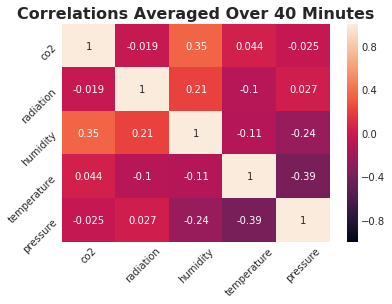

In [22]:
with sns.axes_style('dark'):
    sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cbar=True, linecolor='#000000')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title('Correlations Averaged Over 40 Minutes')
    plt.show()

## Patterns Over Longer Periods of Time
By averaging/binning over longer periods of time, like weeks or months, we can eliminate smaller day-to-day variations in temperature, pressure, etc., thereby by finding longer-term correlations between radiation and weather/environmental phenomena.

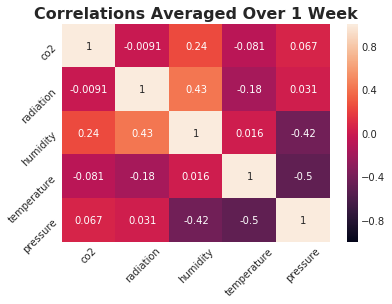

In [23]:
co2_data = pd.read_csv(os.path.join(DATA_DIR, 'data_co2_ppm_604800.csv'),
                       header=0, names=['unix_time', 'co2'], usecols=[1])

radiation_data = pd.read_csv(os.path.join(DATA_DIR, 'data_cpm_604800.csv'),
                             header=0, names=['unix_time', 'radiation'], usecols=[1])

humidity_data = pd.read_csv(os.path.join(DATA_DIR, 'data_humidity_604800.csv'),
                            header=0, names=['unix_time', 'humidity'], usecols=[1])

temperature_data = pd.read_csv(os.path.join(DATA_DIR, 'data_temperature_604800.csv'),
                               header=0, names=['unix_time', 'temperature'], usecols=[1])

pressure_data = pd.read_csv(os.path.join(DATA_DIR, 'data_pressure_604800.csv'),
                            header=0, names=['unix_time', 'pressure'], usecols=[1])

# make one awesome DataFrame object containing all the data
all_data = pd.concat([co2_data, radiation_data, humidity_data, temperature_data, pressure_data],
                     axis=1)
all_data.dropna(axis=0, how='any', inplace=True)
correlation_matrix = all_data.corr(method='pearson')
with sns.axes_style('dark'):
    sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cbar=True, linecolor='#000000')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title('Correlations Averaged Over 1 Week')
    plt.show()

There seems to be some correlation between humidity and radiation, especially in the long term! Let's try averaging over 2 weeks this time and see what the correlation looks like.

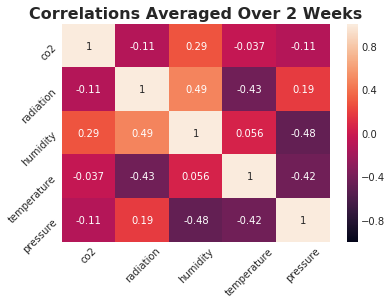

In [24]:
co2_data = pd.read_csv(os.path.join(DATA_DIR, 'data_co2_ppm_1209600.csv'),
                       header=0, names=['unix_time', 'co2'], usecols=[1])

radiation_data = pd.read_csv(os.path.join(DATA_DIR, 'data_cpm_1209600.csv'),
                             header=0, names=['unix_time', 'radiation'], usecols=[1])

humidity_data = pd.read_csv(os.path.join(DATA_DIR, 'data_humidity_1209600.csv'),
                            header=0, names=['unix_time', 'humidity'], usecols=[1])

temperature_data = pd.read_csv(os.path.join(DATA_DIR, 'data_temperature_1209600.csv'),
                               header=0, names=['unix_time', 'temperature'], usecols=[1])

pressure_data = pd.read_csv(os.path.join(DATA_DIR, 'data_pressure_1209600.csv'),
                            header=0, names=['unix_time', 'pressure'], usecols=[1])

# make one awesome DataFrame object containing all the data
all_data = pd.concat([co2_data, radiation_data, humidity_data, temperature_data, pressure_data],
                     axis=1)
all_data.dropna(axis=0, how='any', inplace=True)
correlation_matrix = all_data.corr(method='pearson')
with sns.axes_style('dark'):
    sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cbar=True, linecolor='#000000')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title('Correlations Averaged Over 2 Weeks')
    plt.show()

Currently, trying to broaden the timespan over which we are averaging data might lead to a loss of statistical significance, as the number of samples has an inverse relationship with the length of time that we sample over. Thus we are not going to try to find correlations over longer time intervals right now.

Now let's see the statistical significance of our latest correlation results between radiation and both humidity and temperature.

In [25]:
# function to print correlations and their statistical significance
def corr_and_sig(col_1, col_2):
    r, p = pearsonr(all_data[col_1], all_data[col_2])
    print(f'Correlation between {col_1} and {col_2} is {r:.2f}, and its two-tailed p-value is {p:.2f}.\n')
    
for s in ['co2', 'humidity', 'temperature', 'pressure']:
    corr_and_sig('radiation', s)

Correlation between radiation and co2 is -0.11, and its two-tailed p-value is 0.69.

Correlation between radiation and humidity is 0.49, and its two-tailed p-value is 0.06.

Correlation between radiation and temperature is -0.43, and its two-tailed p-value is 0.11.

Correlation between radiation and pressure is 0.19, and its two-tailed p-value is 0.51.



Interesting! At the $\alpha=0.10$ significance level, there is a moderately strong positive correlation between radiation and humidity! At that significance level, the correlation between radiation and temperature is very close to being statistically significant, and at the $\alpha=0.15$ significance level, it is statistically significant. Let's plot them against each other in order to visually appreciate the correlations!

In [26]:
radiation_data = pd.read_csv(os.path.join(DATA_DIR, 'data_cpm_1209600.csv'),
                             header=0, names=['unix_time', 'radiation'])

humidity_data = pd.read_csv(os.path.join(DATA_DIR, 'data_humidity_1209600.csv'),
                            header=0, names=['unix_time', 'humidity'], usecols=['humidity'])

temperature_data = pd.read_csv(os.path.join(DATA_DIR, 'data_temperature_1209600.csv'),
                            header=0, names=['unix_time', 'temperature'], usecols=['temperature'])

rad_humid = pd.concat([radiation_data, humidity_data, temperature_data], axis=1)
rad_humid.dropna(axis=0, how='any', inplace=True)

[]

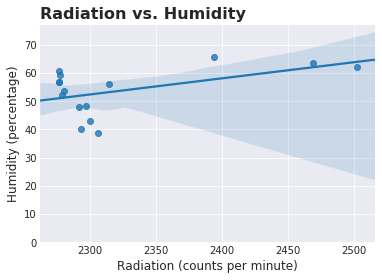

In [27]:
sns.regplot(x='radiation', y='humidity', data=rad_humid)
plt.ylim(ymin=0)
plt.xlabel('Radiation (counts per minute)', fontdict={'fontsize': 12})
plt.ylabel('Humidity (percentage)', rotation=90, fontdict={'fontsize': 12})
plt.title('Radiation vs. Humidity', loc='left')
plt.plot()

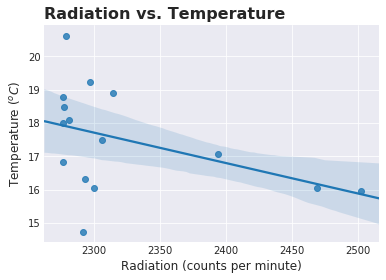

In [28]:
sns.regplot(x='radiation', y='temperature', data=rad_humid)
plt.xlabel('Radiation (counts per minute)', fontdict={'fontsize': 12})
plt.ylabel('Temperature ($^oC$)', rotation=90, fontdict={'fontsize': 12})
plt.title('Radiation vs. Temperature', loc='left')
plt.show()

In [29]:
times = []
for idx, time, _, _, _ in rad_humid.itertuples():
    times.append(datetime.fromtimestamp(int(time)))

dates = pd.Series(times)

In [30]:
pass

In [31]:
# humidity vs. time
time_humid = figure(plot_width=480, plot_height=320,
                    title='Humidity vs. Time', x_axis_type='datetime')
time_humid.line(dates, rad_humid['humidity'], line_width=2)
time_humid.xaxis.formatter=DatetimeTickFormatter(months=["%B %Y"])
time_humid.xaxis.major_label_orientation = 0.854  # 90 degrees in radians
time_humid.yaxis.axis_label = 'Humidity (percentage)'

# temperature vs. time
time_temp = figure(plot_width=480, plot_height=320,
                   title='Temperature vs. Time', x_axis_type='datetime')
time_temp.line(dates, rad_humid['temperature'], line_width=2)
time_temp.xaxis.formatter=DatetimeTickFormatter(months=["%B %Y"])
time_temp.xaxis.major_label_orientation = 0.854
time_temp.yaxis.axis_label = 'Temperature (degrees C)'  # bokeh does not support LaTeX yet

# radiation vs. time
time_rad = figure(plot_width=480, plot_height=320,
                  title='Radiation vs. Time', x_axis_type='datetime')
time_rad.line(dates, rad_humid['radiation'], line_width=2, line_color='#EE00A0')
time_rad.xaxis.formatter=DatetimeTickFormatter(months=["%B %Y"])
time_rad.xaxis.major_label_orientation = 0.854
time_rad.yaxis.axis_label = 'Radiation (counts per minute)'

show(column(row(time_humid, time_temp), time_rad))

Let's make the same plots as above, but with data averaged over 5 days instead of 14, so that we can see finer changes (and some more noise) in the measured quantities.

In [32]:
radiation_data = pd.read_csv(os.path.join(DATA_DIR, 'data_cpm_432000.csv'),
                             header=0, names=['unix_time', 'radiation'])

humidity_data = pd.read_csv(os.path.join(DATA_DIR, 'data_humidity_432000.csv'),
                            header=0, names=['unix_time', 'humidity'], usecols=['humidity'])

temperature_data = pd.read_csv(os.path.join(DATA_DIR, 'data_temperature_432000.csv'),
                            header=0, names=['unix_time', 'temperature'], usecols=['temperature'])

rad_humid = pd.concat([radiation_data, humidity_data, temperature_data], axis=1)
rad_humid.dropna(axis=0, how='any', inplace=True)

times = []
for idx, time, _, _, _ in rad_humid.itertuples():
    times.append(datetime.fromtimestamp(int(time)))

dates = pd.Series(times)

# humidity vs. time
time_humid = figure(plot_width=480, plot_height=320,
                    title='Humidity vs. Time', x_axis_type='datetime')
time_humid.line(dates, rad_humid['humidity'], line_width=2)
time_humid.xaxis.formatter=DatetimeTickFormatter(months=["%B %Y"])
time_humid.xaxis.major_label_orientation = 0.854  # 90 degrees in radians
time_humid.yaxis.axis_label = 'Humidity (percentage)'

# temperature vs. time
time_temp = figure(plot_width=480, plot_height=320,
                   title='Temperature vs. Time', x_axis_type='datetime')
time_temp.line(dates, rad_humid['temperature'], line_width=2)
time_temp.xaxis.formatter=DatetimeTickFormatter(months=["%B %Y"])
time_temp.xaxis.major_label_orientation = 0.854
time_temp.yaxis.axis_label = 'Temperature (degrees C)'  # bokeh does not support LaTeX yet

# radiation vs. time
time_rad = figure(plot_width=480, plot_height=320,
                  title='Radiation vs. Time', x_axis_type='datetime')
time_rad.line(dates, rad_humid['radiation'], line_width=2, line_color='#EE00A0')
time_rad.xaxis.formatter=DatetimeTickFormatter(months=["%B %Y"])
time_rad.xaxis.major_label_orientation = 0.854
time_rad.yaxis.axis_label = 'Radiation (counts per minute)'

show(column(row(time_humid, time_temp), time_rad))

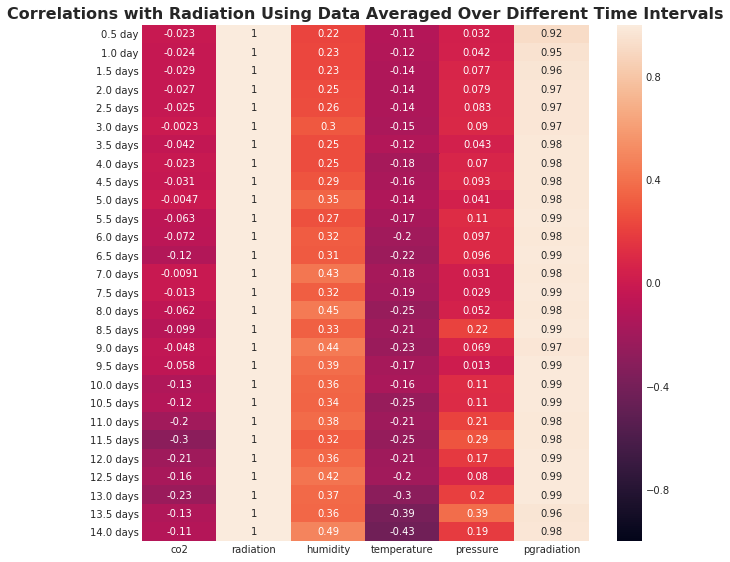

In [33]:
SECONDS_IN_A_HALF_DAY = 43200  # 60 * 60 * 12
df_list = []
correlation_list = []

def get_corrs(interval):
    co2_data = pd.read_csv(os.path.join(DATA_DIR, f'data_co2_ppm_{interval}.csv'),
                           header=0, names=['unix_time', 'co2'], usecols=[1])

    radiation_data = pd.read_csv(os.path.join(DATA_DIR, f'data_cpm_{interval}.csv'),
                                 header=0, names=['unix_time', 'radiation'], usecols=[1])
    
    pgradiation_data = pd.read_csv(os.path.join(DATA_DIR, f'data_cpmpg_{interval}.csv'),
                                   header=0, names=['unix_time', 'pgradiation'], usecols=[1])

    humidity_data = pd.read_csv(os.path.join(DATA_DIR, f'data_humidity_{interval}.csv'),
                                header=0, names=['unix_time', 'humidity'], usecols=[1])

    temperature_data = pd.read_csv(os.path.join(DATA_DIR, f'data_temperature_{interval}.csv'),
                                   header=0, names=['unix_time', 'temperature'], usecols=[1])

    pressure_data = pd.read_csv(os.path.join(DATA_DIR, f'data_pressure_{interval}.csv'),
                                header=0, names=['unix_time', 'pressure'], usecols=[1])

    # make one awesome DataFrame object containing all the data
    all_data = pd.concat([co2_data, radiation_data, humidity_data, temperature_data, 
                          pressure_data, pgradiation_data],
                         axis=1)
    all_data.dropna(axis=0, how='any', inplace=True)
    correlation_matrix = all_data.corr(method='pearson')
    
    return correlation_matrix.iloc[1]

for i in range(1, 29):
    if i <= 2:
        correlation_list.append(get_corrs(int(i * SECONDS_IN_A_HALF_DAY)).rename(f'{i/2:.1f} day'))
    else:
        correlation_list.append(get_corrs(int(i * SECONDS_IN_A_HALF_DAY)).rename(f'{i/2:.1f} days'))
correlation_df = pd.DataFrame(correlation_list)
# print(correlation_df)

with sns.axes_style('dark'):
    plt.figure(figsize=(10, 9.5))
    sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True, cbar=True, linecolor='#000000')
#     plt.xticks(rotation=45)
#     plt.yticks(rotation=45)
    plt.title('Correlations with Radiation Using Data Averaged Over Different Time Intervals')
    plt.show()

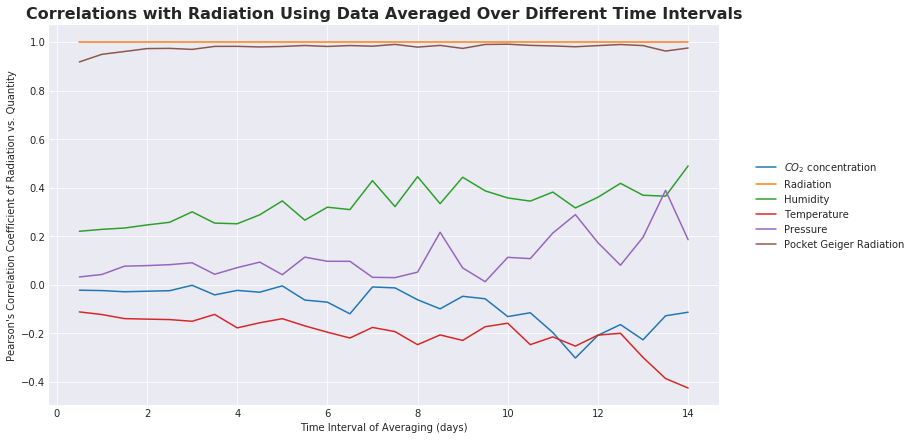

In [34]:
plt.figure(figsize=(12, 7))
plt.plot([i/2 for i in range(1, 29)], correlation_df['co2'],
         [i/2 for i in range(1, 29)], correlation_df['radiation'],
         [i/2 for i in range(1, 29)], correlation_df['humidity'],
         [i/2 for i in range(1, 29)], correlation_df['temperature'],
         [i/2 for i in range(1, 29)], correlation_df['pressure'],
         [i/2 for i in range(1, 29)], correlation_df['pgradiation'])
plt.legend(['$CO_2$ concentration', 'Radiation', 'Humidity', 'Temperature', 'Pressure',
            'Pocket Geiger Radiation'], loc=(1.05, 0.4))
plt.xlabel('Time Interval of Averaging (days)')
plt.ylabel("Pearson's Correlation Coefficient of Radiation vs. Quantity", rotation=90)
plt.title('Correlations with Radiation Using Data Averaged Over Different Time Intervals')
plt.show()